In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree, ensemble
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

(a) Use the breast cancer data set from Homework 0 to create a training set.
Recall that the label is 0 if the patient has breast cancer and 1 otherwise.
Compute the base rate of cancer occurrence over the entire data set.

In [3]:
cancer=load_breast_cancer() #load the breast cancer dataset

df=pd.DataFrame(cancer.data, columns=cancer.feature_names) #loading the dataframe
df['target']=cancer.target #Adding the cancer label column to the dataframe

malignantTumorCases=len(np.where(df['target']==0)[0]) #count of malignant tumor cases from total
totalCases=cancer.data.shape[0] #total dataset entries

baseRate=malignantTumorCases/totalCases #calculating the base rate of malignant tumor
print(baseRate)

0.37258347978910367


**On random seeds:** Many functions in scikit-learn, including models as well as utilities,
use randomization. For ease of grading, we will fix a random seed (we will use 101 throughout)
so as to make behavior deterministic. This can generally be done by passing in `random_state=101` to
the function; please consult documentation if unsure. Note to peer graders: this is purely for grading
convenience. Do not penalize harshly if the random seed has not been set properly.

(b) The goal is to build a decision tree that, based on the other features in the set,
predicts whether or not a patient has cancer.  So this is a classification problem.
Using tree.DecisionTreeClassifier and other functions in the scikit-learn library, one can
build a decision tree and calculate both its training accuracy when fitted to the entire data set
as well as its accuracy using 10-fold cross validation (which gives a better idea of true accuracy).

Vary the depth of your decision tree (use max_depth = $1, 2, \dots, 10$) and plot both training
accuracy and cross-validated accuracy (as a function of the depth, on the x-axis). Use 101 as your
random seed. Plot both curves on the same plot and use a legend to label them.

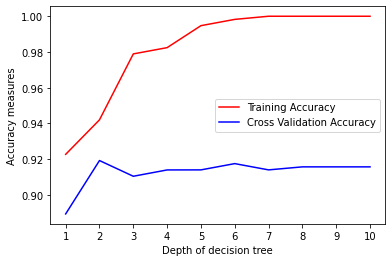

In [4]:
trainingAccuracy=[] #this holds the training accuracy for depths for 1 to 10
crossValidationAccuracy=[] #this holds the 10 fold cross validation accuracy for depths 1 to 10

for d in range(1,11):
    clf = tree.DecisionTreeClassifier(max_depth=d,random_state=101)
    clf = clf.fit(cancer.data, cancer.target)
    crossValidationAccuracy.append(cross_val_score(estimator=clf, X=cancer.data, y=cancer.target,cv=10).mean())
    trainingAccuracy.append(clf.score(cancer.data,cancer.target))
    
depth=list(range(1,11))

plt.plot(depth,trainingAccuracy,c='red',label='Training Accuracy')
plt.plot(depth,crossValidationAccuracy,c='blue',label='Cross Validation Accuracy')

_=plt.xticks(range(1,11))
plt.xlabel('Depth of decision tree')
plt.ylabel('Accuracy measures')

plt.legend(loc='center right')

(c) Now try the random forest classifier of the scikit-learn library and use the best
depth you get from (b) as max_depth. Vary the number of trees in the forest via the parameter
n_estimators and plot its 10-fold cross-validated accuracy (use n_estimators = $1, 2, \dots, 20$).
Again, use 101 as your random seed. Do you see an improvement using random forests versus
using a single tree? (Note: use the n_estimators=1 result as the result for a single tree.)

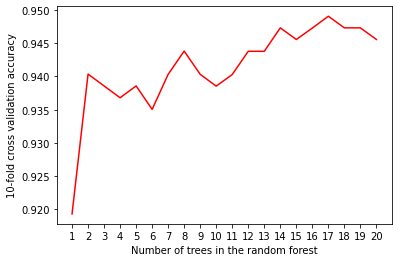

In [7]:
result=[] #this holds the 10 fold cross validation accuracy for depths 1 to 20 
bestCrossValidationDepth=np.argmax(crossValidationAccuracy,axis=0) + 1 #get the best cross validation depth from the last example

for i in range(1,21):
    rf = ensemble.RandomForestClassifier(max_depth=bestCrossValidationDepth,n_estimators=i,random_state=101)
    result.append(cross_val_score(rf,cancer.data,cancer.target,cv=10).mean())
estimators=list(range(1,21))
plt.plot(estimators,result,c="red")
plt.xlabel('Number of trees in the random forest')
plt.ylabel('10-fold cross validation accuracy')
_=plt.xticks(list(range(1,21)))  #to supress the output associated with xticks


<blockquote>As seen in the graph for depth = 1 Vs depth = 20, we see a definite improvement in 10-fold cross validation accuracy using random forests vs a single tree</blockquote>

(d) Using the method for building a decision tree you used in part (b), build a tree
but randomly hold out a $.2$,$.4$,$.6$, and $.8$ fraction of the data set (so you 
will need to build 4 different trees for each depth value). Use 101 as your random seed for both
the train-test split as well as the decision tree.
For each fraction held out, plot a curve of the test accuracy (the accuracy on the held-out
set) against depth. You should have four curves. Plot them all on the same plot and use
a legend to label them.

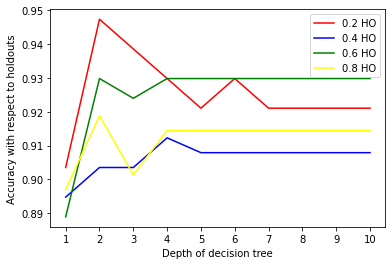

In [8]:
accuracy_matrix=[] #this will contain the accuracy for decision tree depths 1-10 with holdouts 0.2, 0.4, 0.6, 0.8 respectively
ratios=[0.2,0.4,0.6,0.8]

for i in ratios:
    X_train,X_test,Y_train,Y_test=train_test_split(cancer.data,cancer.target,test_size=i,random_state=101)
    for depth in range(1,11):
        clf=tree.DecisionTreeClassifier(max_depth=depth,random_state=101)
        clf=clf.fit(X_train,Y_train) #fitting the data on training set
        predicted=clf.predict(X_test) #get the predicted values of the testing data on our model 
        accuracy_matrix.append(accuracy_score(Y_test,predicted)) #calculate the accuracy score for each depth and hold-out ratio
        
accuracy_matrix=np.array_split(accuracy_matrix,4) #we split the array to get accuracy values for each holdout in a different array

depth=list(range(1,11))

#plotting the graph
plt.plot(depth,accuracy_matrix[0],color='red')
plt.plot(depth,accuracy_matrix[1],color='blue')
plt.plot(depth,accuracy_matrix[2],color='green')
plt.plot(depth,accuracy_matrix[3],color='yellow')

plt.xlabel('Depth of decision tree')
plt.ylabel('Accuracy with respect to holdouts')

plt.legend(labels=['0.2 HO','0.4 HO','0.6 HO','0.8 HO'],loc='best')
_=plt.xticks(range(1,11))